cartopy.crs.TransverseMercator

['../FINALES/PARCELAS/JERTE/QUEMA_JERTE_1_ENTRERIOS.shp',
 '../FINALES/PARCELAS/JERTE/QUEMA_JERTE_2_NIJARRA_PASTOS.shp',
 '../FINALES/PARCELAS/JERTE/QUEMA_JERTE_3.shp']

'QUEMA_JERTE_1_ENTRERIOS'

/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7feb289c5710> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


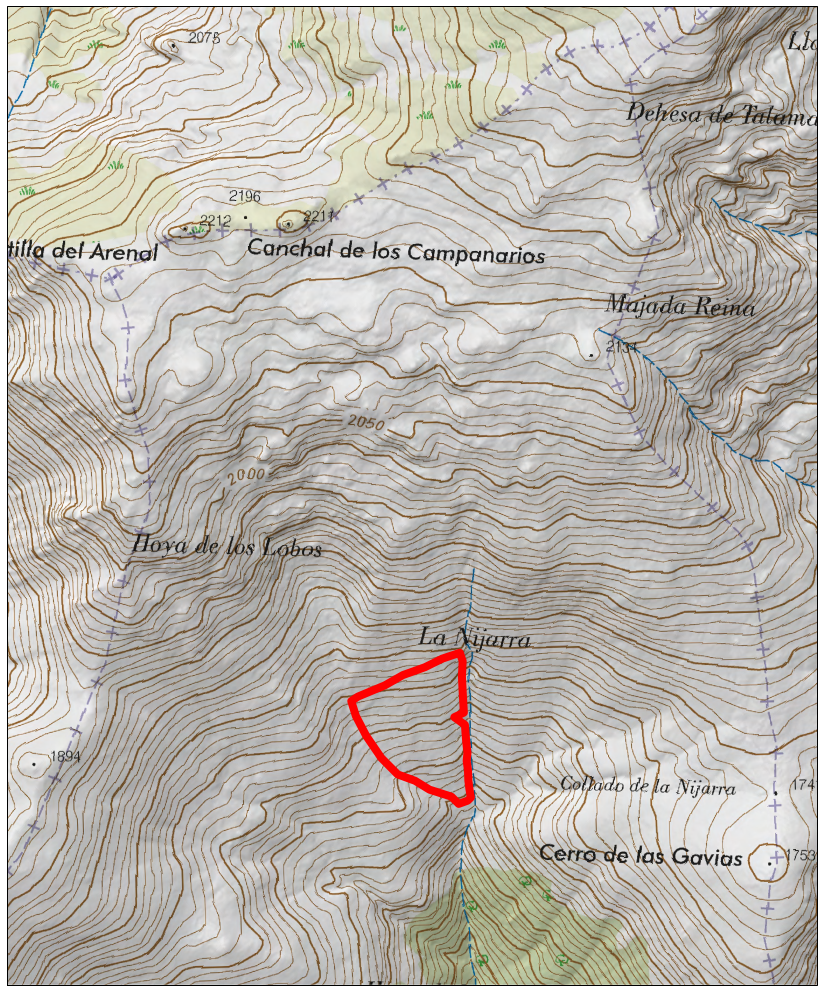

'QUEMA_JERTE_2_NIJARRA_PASTOS'

/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7feb28835cb0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


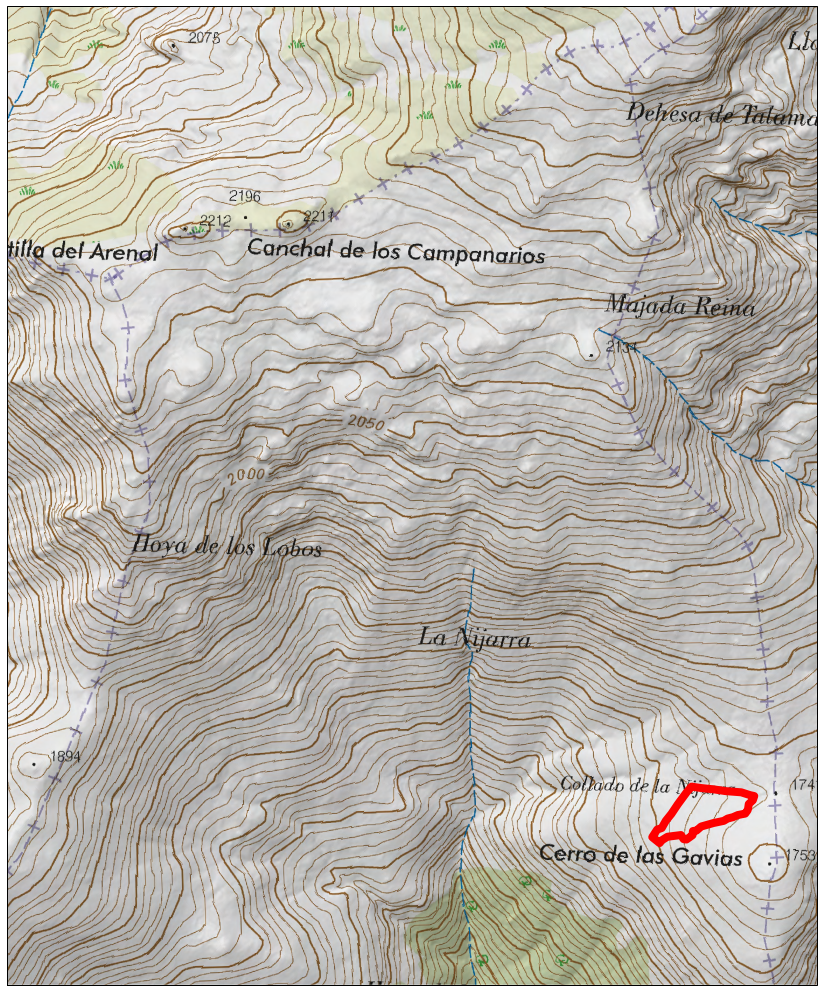

'QUEMA_JERTE_3'

/home/nano/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7feb283c01d0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


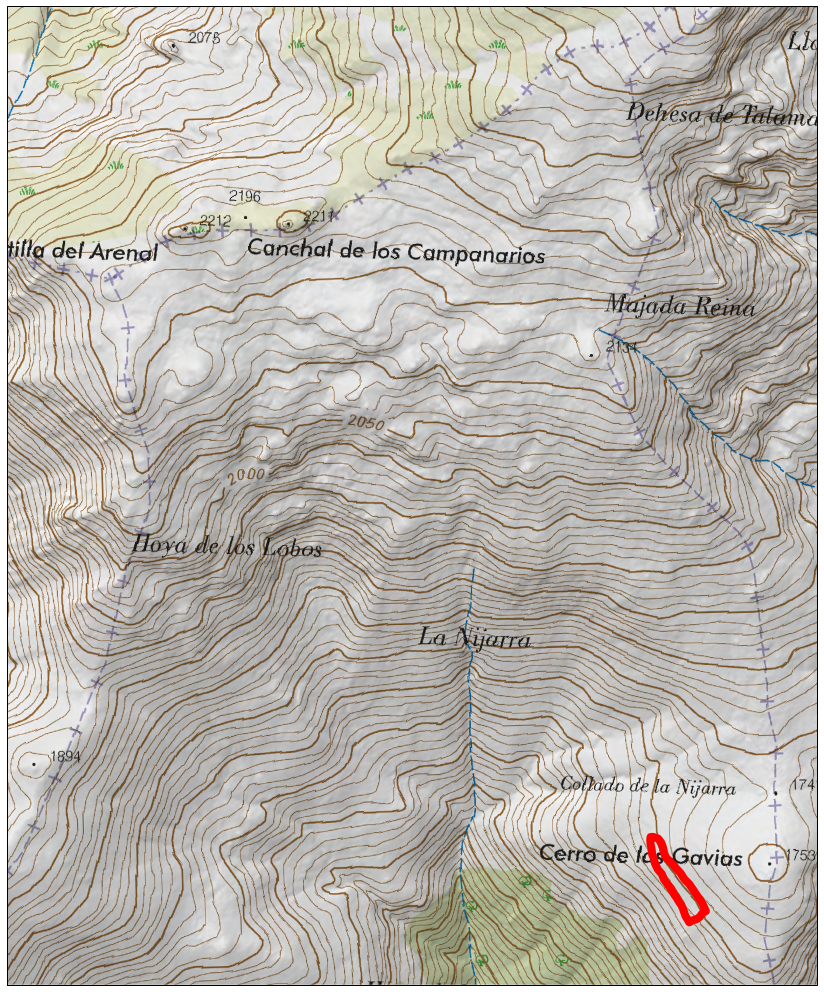

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs

marco = gpd.read_file('../BRUTOS/cartografia/zona_estudio.shp')

proj = ccrs.TransverseMercator(central_longitude=-3.0,central_latitude=0.0,
                           false_easting=500000.0,false_northing=0.0,
                           scale_factor=0.9996)
display(type(proj))
a = !ls ../FINALES/PARCELAS/JERTE/*shp
display(a)
for parcela in a:
    ze = gpd.read_file(parcela)
    fig = plt.figure(figsize=(24,18))
    ax = plt.axes(projection=proj)
    lim = list(marco.bounds.iloc[1])
    ax.set_extent([lim[0],lim[2], lim[1], lim[3]], crs=proj)

    imagen = parcela.split('/')[4].split('.')[0]
    display(imagen)
    ax.add_wms(wms='https://www.ign.es/wms-inspire/mapa-raster', layers=['mtn_rasterizado'])
    ax.add_geometries(ze.loc[[0], 'geometry'], facecolor=(0.8,0,0,0), edgecolor='red', linewidth=8, crs=ccrs.Geodetic())
    fig.savefig('static/images/{}'.format(imagen), bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)